# Stoneburner, Kurt
- ## DSC 650 - Assignment 5.3 - Tensorflow Keras Regression Example

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb

In [1]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)


from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#//********************************************************
#//*** Attempt to modularize a Sequential Keras Module.
#//********************************************************
def build_model(**kwargs):
    #//*** Define the Model
    from tensorflow.keras import models
    from tensorflow.keras import layers
    from tensorflow.keras import optimizers
    
    
    #//*****************************
    #//*** Set Default values
    #//*****************************
    
    #//*** Total Layers is the total layers including the input layer, hidden layer(s) and output layer
    total_layers = 2
    
    #//*** Hidden units to be appled to all layers except the last one
    hidden_units = 16
    #//*** Activation Function to be applied to all layers except the last one
    first_activation = "relu"
    
    #//*** Activation Function for the last layer. No Activation is applied if None
    final_activation=None
    
    #//*** Complie Optimzer
    optimizer='rmsprop'  
    
    #//*** Loss Function for Optimizer
    loss = 'mse'
    
    #//*** Optimizer Metrics 
    metrics=['accuracy']
    
    #//*** Tuple Defined Shape of the First Layer. None means this value is not included
    shape = None
    
    #//*** Apply compiler to the model
    do_compile = True
    
    #//*** Number of Units (outputs) for the output layer.
    output_layer = 1
    
    #//*** Print a Representation of the Model
    display_model = True
    
    #//*** Modify the default settings with **kwargs
    #//*** Apply Kwargs
    for key,value in kwargs.items():
        
        if key == 'layers':
            total_layers=value

        if key == 'hidden_units':
            hidden_units=value
        
        if key == 'loss':
            loss=value
        
        if key == 'first_activation':
            first_activation=value
    
        if key == 'final_activation':
            final_activation=value
    
        if key == 'optimizer':
            optimizer=value
    
        if key == 'metrics':
            metrics=value
            
        if key == 'shape':
            shape = value

        if key == 'compile':
            do_compile = value
            
        if key == 'output_layer':
            output_layer = value
            
        if key == 'display_model':
            display_model = value
        
    disp = ""
    #//*** Initialize the model
    model = models.Sequential()
    
    if display_model:
        disp += "models.Sequential()"
        disp +="\n"
    
    #//*** Add the First Layer. Include an Input_Shape paramter if one is included
    if shape == None:
        #//*** Add First Layer
        model.add(layers.Dense(hidden_units, activation=first_activation ))
        if display_model:
            disp += f"model.add(layers.Dense({hidden_units}, activation={first_activation} )) "
            disp +="\n"

    else:
        #//*** Add First Layer
        model.add(layers.Dense(hidden_units, activation=first_activation, input_shape=shape ))

        if display_model:
            disp += f"model.add(layers.Dense({hidden_units}, activation={first_activation}, input_shape={shape} )) "
            disp +="\n"
    
    
    #//*** Add Additional Layers if total_layers greater than 2
    for x in range(total_layers-2):
        
        #//*** These are basic layers with same number of hidden units and using first_activation
        model.add(layers.Dense(hidden_units, activation=first_activation))
        if display_model:
            disp += f"model.add(layers.Dense({hidden_units}, activation={first_activation}))"
            disp +="\n"
    
    
    
    #//*** Add Final Layer
    
    if final_activation == None:
        model.add(layers.Dense(output_layer))
        
        if display_model:
            disp += f"model.add(layers.Dense({output_layer}))"
            disp +="\n"

    else:
        model.add(layers.Dense(output_layer, activation=final_activation))

        if display_model:
            disp += f"model.add(layers.Dense({output_layer}, activation={final_activation}))"
            disp +="\n"
                  
    #//*** Compile Model
    if do_compile:
        
        model.compile(optimizer=optimizer,loss=loss,metrics=metrics)
    
        if display_model:
            disp += f"model.compile(optimizer={optimizer},loss={loss},metrics={metrics})"
            disp +="\n"
    
    if display_model:
        print(disp)
        
    return model



## Predicting house prices: A regression example ##

In [3]:
#//*** Import the housing Dataset from Keras
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [4]:
print("Train Shape: ", train_data.shape)
print("Test Shape: ", test_data.shape)

Train Shape:  (404, 13)
Test Shape:  (102, 13)


Need Notes on normalizing the Data

And each feature in the input data (for example, the crime rate) has a different scale. For instance, some values are proportions, which take values between 0 and 1; others take values between 1 and 12, oth-ers between 0 and 100, and so on.

As  you  can  see,  you  have  404  training  samples  and  102  test  samples,  each  with  13 numerical features, such as per capita crime rate, average number of rooms per dwelling, accessibility to highways, and so on.  The  targets  are  the  median  values  of  owner-occupied  homes,  in  thousands  of dollars:

## Normalization ##

**feature-wise normalization: Subtract the Feature (column) Mean and Divide by the Standard Deviation**

It would be problematic to feed into a neural network values that all take wildly differ-ent ranges. The network might be able to automatically adapt to such heterogeneousdata, but it would definitely make learning more difficult. A widespread best practiceto deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), you subtract the mean of the feature anddivide  by  the  standard  deviation,  so  that  the  feature  is  centered  around  0  and  has  aunit standard deviation. This is easily done in Numpy.

**Note:**  that  the  quantities  used  for  normalizing  the  test  data  are  computed  using  the training data. You should never use in your workflow any quantity computed on the test data, even for something as simple as data normalization.

In [5]:
#//*******************************
#//*** Normalize the Data
#//*******************************

#//*** Get the Mean of each Column in the Matrix
mean = train_data.mean(axis=0)

#//*** Subtract the Mean
train_data -= mean

#//*** Get the Standard Deviation
std = train_data.std(axis=0)

#//*** Divide by the Standard Deviation
train_data /= std

#//*** Subtract the Mean from the test Data
test_data -= mean

#//*** Divide the Standard Deviation from the Test Data
test_data /= std

Because so few samples are available, you’ll use a very small network with two hidden layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using a small network is one way to mitigate overfitting.

The network ends with a single unit and no activation (it will be a linear layer). This isa typical setup for scalar regression (a regression where you’re trying to predict a singlecontinuous value). Applying an activation function would constrain the range the out-put can take; for instance, if you applied a sigmoid activation function to the last layer,the network could only learn to predict values between 0 and 1. Here, because the lastlayer is purely linear, the network is free to learn to predict values in any range.

**Note:** that you compile the network with the mse loss function—mean squared error,the square of the difference between the predictions and the targets. This is a widely used loss function for regression problems. You’re also monitoring a new metric during training: mean absolute error (MAE). It’s the  absolute  value  of  the  difference  between  the  predictions  and  the  targets.  For instance, an MAE of 0.5 on this problem would mean your predictions are off by $500 on average.

## Validate the Model ysubf K-fold validation ##

To evaluate your network while you keep adjusting its parameters (such as the number of epochs used for training), you could split the data into a training set and a valida-tion set, as you did in the previous examples. But because you have so few data points, the validation set would end up being very small (for instance, about 100 examples). As a consequence, the validation scores might change a lot depending on which datapoints you chose to use for validation and which you chose for training: the validations cores might have a high variance with regard to the validation split. This would prevent you from reliably evaluating your model. The best practice in such situations is to use K-fold cross-validation.It consists of splitting the available data into K partitions (typically K = 4 or 5), instantiating K identical models, and training each one on K – 1 partitions while evaluating onthe remaining partition. The validation score for the model used is then the average ofthe K validation scores obtained. In terms of code, this is straightforward.

Instead of selecting a Validation Subset, K-Fold validation runs splits the data into multiple different validation sets and scores them all. The average of the validations is a validation estimate of the model.

In [6]:
#//************************************
#//*** Book Supplied Model Settings
#//************************************
layers = 3
hidden_units = 64
first_activation = "relu"
optimizer = "rmsprop"
loss = 'mse'
metrics = ['mae']


#//*** F-Fold Validation
k = 4
num_val_samples = len(train_data) // k #//*** Floor Division
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model(
        layers=layers, 
        hidden_units = hidden_units,
        first_activation = first_activation,
        optimizer=optimizer,
        loss=loss,
        metrics=metrics,
        output_layer = 1
    )

    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)



Processing fold #0
models.Sequential()
model.add(layers.Dense(64, activation=relu )) 
model.add(layers.Dense(64, activation=relu))
model.add(layers.Dense(1))
model.compile(optimizer=rmsprop,loss=mse,metrics=['mae'])

Processing fold #1
models.Sequential()
model.add(layers.Dense(64, activation=relu )) 
model.add(layers.Dense(64, activation=relu))
model.add(layers.Dense(1))
model.compile(optimizer=rmsprop,loss=mse,metrics=['mae'])

Processing fold #2
models.Sequential()
model.add(layers.Dense(64, activation=relu )) 
model.add(layers.Dense(64, activation=relu))
model.add(layers.Dense(1))
model.compile(optimizer=rmsprop,loss=mse,metrics=['mae'])

Processing fold #3
models.Sequential()
model.add(layers.Dense(64, activation=relu )) 
model.add(layers.Dense(64, activation=relu))
model.add(layers.Dense(1))
model.compile(optimizer=rmsprop,loss=mse,metrics=['mae'])



In [7]:
print("All Scores: ", all_scores)
print("Mean Scores: ",np.mean(all_scores))

All Scores:  [1.8729946613311768, 2.6107888221740723, 2.4159820079803467, 2.37795090675354]
Mean Scores:  2.319429099559784


In [8]:
#//*** Saving the validation logs of each fold
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model(
        layers=layers, 
        hidden_units = hidden_units,
        first_activation = first_activation,
        optimizer=optimizer,
        loss=loss,
        metrics=metrics,
        output_layer = 1
    )
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)



Processing fold #0
models.Sequential()
model.add(layers.Dense(64, activation=relu )) 
model.add(layers.Dense(64, activation=relu))
model.add(layers.Dense(1))
model.compile(optimizer=rmsprop,loss=mse,metrics=['mae'])

Processing fold #1
models.Sequential()
model.add(layers.Dense(64, activation=relu )) 
model.add(layers.Dense(64, activation=relu))
model.add(layers.Dense(1))
model.compile(optimizer=rmsprop,loss=mse,metrics=['mae'])

Processing fold #2
models.Sequential()
model.add(layers.Dense(64, activation=relu )) 
model.add(layers.Dense(64, activation=relu))
model.add(layers.Dense(1))
model.compile(optimizer=rmsprop,loss=mse,metrics=['mae'])

Processing fold #3
models.Sequential()
model.add(layers.Dense(64, activation=relu )) 
model.add(layers.Dense(64, activation=relu))
model.add(layers.Dense(1))
model.compile(optimizer=rmsprop,loss=mse,metrics=['mae'])



In [9]:
#//*** Building the history of successive mean K-fold validation Scores
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

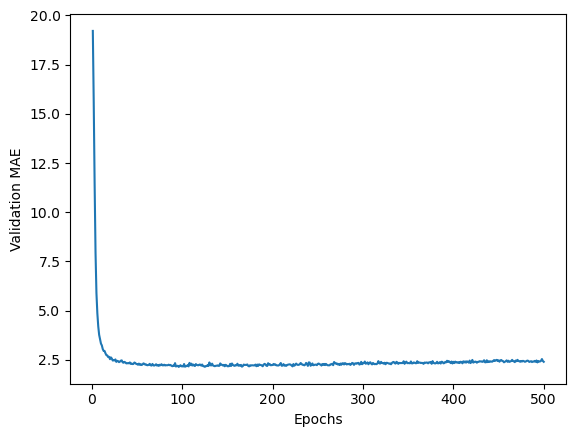

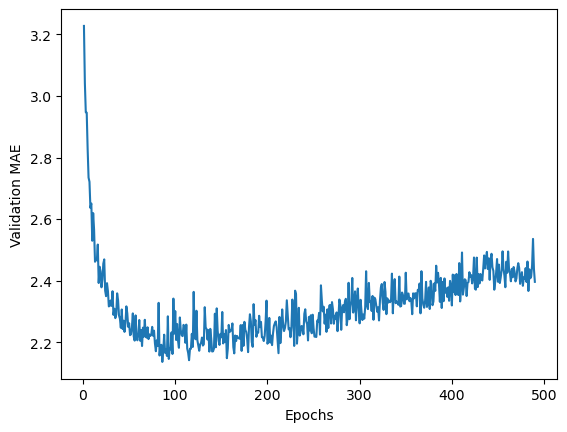

In [10]:
#//*** Plotting Validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

#//*** Plotting Validation scores excluding the first 10 data Points


truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()



In [11]:
#//*** Training the Final Model
#model = build_model()


#//****************************
#//*** Book Supplied Settings
#//****************************
layers = 3
hidden_units = 64
first_activation = "relu"
optimizer = "rmsprop"
loss = 'mse'
metrics = ['mae']
model = build_model(
    layers=layers, 
    hidden_units = hidden_units,
    first_activation = first_activation,
    optimizer=optimizer,
    loss=loss,
    metrics=metrics,
    output_layer = 1
)

model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("test_mae_score: ",test_mae_score)

#//*** Generate Predictions on the test_data
predictions = model.predict(test_data)
print("Predictions: ", predictions[0])

predictions = predictions.flatten()



models.Sequential()
model.add(layers.Dense(64, activation=relu )) 
model.add(layers.Dense(64, activation=relu))
model.add(layers.Dense(1))
model.compile(optimizer=rmsprop,loss=mse,metrics=['mae'])

4/4 [==============================] - 0s 0s/step - loss: 16.9921 - mae: 2.5225
test_mae_score:  2.5225348472595215
Predictions:  [9.462795]


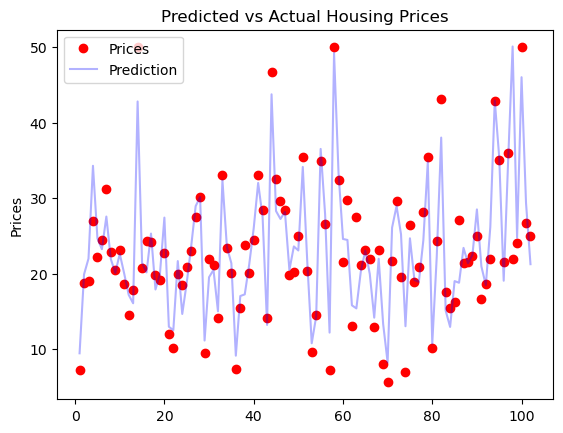

In [15]:
#//*** Plot Predicted vs actual Values
plt.plot(range(1, len(predictions) + 1), test_targets, "bo", label="Prices", color='red')
plt.plot(range(1, len(predictions) + 1), predictions, "b", label="Prediction", alpha=.3)
plt.ylabel("Prices")
plt.legend()
plt.title("Predicted vs Actual Housing Prices")
plt.show()